

The overall aims of this notebook are as follows:

* Show the change in flat prices in each area for the period from July 2017 to July 2018.
* Visualize this change across the different regions of the country.
* Discuss any patterns we might observe in the relationship between the change in price and the corresponding region.
* Perform Chi-squared and permutation tests to assess the independence of these two factors.

## Table of Contents
1. Calculation and visualization of the change in flat prices
2. Statistical analysis of the independence between the region and the change in price
3. Discussion of the results of the statistical tests

## Section 1: Calculation and Visualisation of the Change in Flat Prices

In this section, the aim is to show the change in flat prices across different areas of the country:

* We will filter the data to include only the values of interest and calculate the price differences.
* The data will be visualized as bar charts, with regions grouped into North of England, Midlands, and South of England.

### Section 1.1: Import Libraries and Load the Data

In this section, we will import the relevant libraries, which will enable us to do the following:

* Create and manipulate the dataframe
* Visualize the dataframes
* Perform statistical analysis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
prices = pd.read_csv('average_flat_prices.csv')
prices

,Area,Code,Price,Month,RegionName,RegionCode
0,Hartlepool,E06000001,62078.20672,2016-09-01,North East,E12000001
1,Hartlepool,E06000001,61893.84174,2016-10-01,North East,E12000001
2,Hartlepool,E06000001,61909.33647,2016-11-01,North East,E12000001
3,Hartlepool,E06000001,62919.44401,2016-12-01,North East,E12000001
4,Hartlepool,E06000001,60770.80795,2017-01-01,North East,E12000001
...,...,...,...,...,...,...
5431,Worcestershire,E10000034,129009.66830,2019-04-01,West Midlands,E12000005
5432,Worcestershire,E10000034,128117.93010,2019-05-01,West Midlands,E12000005
5433,Worcestershire,E10000034,129593.06920,2019-06-01,West Midlands,E12000005
5434,Worcestershire,E10000034,129684.34220,2019-07-01,West Midlands,E12000005


### Section 1.2 Introduction to the Dataset

*  In this section we provide a brief description of all of the variables

| Variable Name | Description   |                                                                                     
  | ------------- | ------------- |
  | Date     | A date, which is the first of the month, between September 1st 2016 and August 1st 2019. 36 months in total. |
  | Area     | The name of a local government area|
  | RegionName    | The name of the region of which this area is part |
  | RegionCode   | The code of the region|
  | Price        | Average sale price of a flat (an apartment) property in this area in the month |


### Section 1.3: Calculate the Difference in Flat Price

In this section, we will calculate the difference in flat prices using the following steps:

* Create a new dataframe that contains only the data for flats between July 2017 and July 2018
* Using that data, create a pivot table containing the `Area`, `Region`, `Year`, and `Price`
* Create a new column that calculates the difference between the prices in 2018 and 2017

In [13]:
prices_small = prices.loc[(prices.Month == '2017-07-01') | (prices.Month == '2018-07-01')]
prices_small['Year'] = pd.to_datetime(prices_small['Month']).dt.year
prices_pivot = prices_small.pivot(index=['RegionName','Area'], columns='Year', values='Price')
prices_pivot.columns = ['Price2017', 'Price2018']
prices_pivot = prices_pivot.reset_index()
prices_pivot['Price Change'] = prices_pivot.Price2018 - prices_pivot.Price2017
prices_pivot

/var/folders/15/1_wklszx7252qmvrxtpkhgzm0000gn/T/ipykernel_1953/1472034839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_small['Year'] = pd.to_datetime(prices_small['Month']).dt.year


,RegionName,Area,Price2017,Price2018,Price Change
0,East Midlands,City of Derby,95940.21897,96708.36963,768.15066
1,East Midlands,City of Nottingham,108859.84530,110295.36520,1435.51990
2,East Midlands,Derbyshire,115450.93520,117801.62630,2350.69110
3,East Midlands,Leicester,120506.20300,125824.12160,5317.91860
4,East Midlands,Leicestershire,122325.99780,125042.02740,2716.02960
...,...,...,...,...,...
146,Yorkshire and The Humber,North Yorkshire,138034.75480,138503.30320,468.54840
147,Yorkshire and The Humber,Rotherham,80127.94712,82237.41396,2109.46684
148,Yorkshire and The Humber,Sheffield,109118.56590,112189.50390,3070.93800
149,Yorkshire and The Humber,Wakefield,85260.35706,84010.08176,-1250.27530


* In the above cells, we filtered the main dataset to contain only values from July 2017 to July 2018. In addition, I have added a new column, `Price Change`, which holds the difference between the flat prices from 2017 to 2018.

### Section 1.4: Visualizing Change in Flat Prices Across Regions

In this section, we will visualize the difference in flat prices across different regions of the country.

* Initially, we will create new dataframes that contain the data for the specific regions of the country.
* Then, we will plot the change in price for each region, grouping them based on their geographical location.

 | Variable Name | Description   |                                                                                     
  | ------------- | ------------- |
  | NE      | North East - Contains data for all Areas in the North East Region                                         |
  | NW      | North West - Contains data for all Areas in the North West Region                                                                      |
  | YTH    | Yorkshire and The Hubmer - Contains data for all Areas in the Yorkshire and The Humber Region                                                             |
  | EM   | East Midlands - Contains data for all Areas in the East midlands Region                                                           |
  | WM        | West Midlands - Contains data for all Areas in the West Midlands Region                             |
  | SW     | South West - Contains data for all Areas in the South West Region   |
  | EOE      | East of England - Contains data for all Areas in the East of England Region   |
  | SE     | South East - Contains data for all Areas in the South East Region   |
  | LDN     | London - Contains data for all Areas in London   |
  

In [4]:
grpbyregion = prices_pivot.groupby('RegionName')
NE = grpbyregion.get_group('North East')
NW = grpbyregion.get_group('North West')
YTH = grpbyregion.get_group('Yorkshire and The Humber')
EM = grpbyregion.get_group('East Midlands')
WM = grpbyregion.get_group('West Midlands')
SW = grpbyregion.get_group('South West')
EOE = grpbyregion.get_group('East of England')
SE = grpbyregion.get_group('South East')
LDN = grpbyregion.get_group('London')


* In the above cell, the data was grouped by region and stored in different variables. This was done to allow easier plotting of the data.


/var/folders/15/1_wklszx7252qmvrxtpkhgzm0000gn/T/ipykernel_1953/1571722162.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(NE['Area'], rotation=45, ha='right')
/var/folders/15/1_wklszx7252qmvrxtpkhgzm0000gn/T/ipykernel_1953/1571722162.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(NW['Area'], rotation=45, ha='right')
/var/folders/15/1_wklszx7252qmvrxtpkhgzm0000gn/T/ipykernel_1953/1571722162.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(YTH['Area'], rotation=45, ha='right')


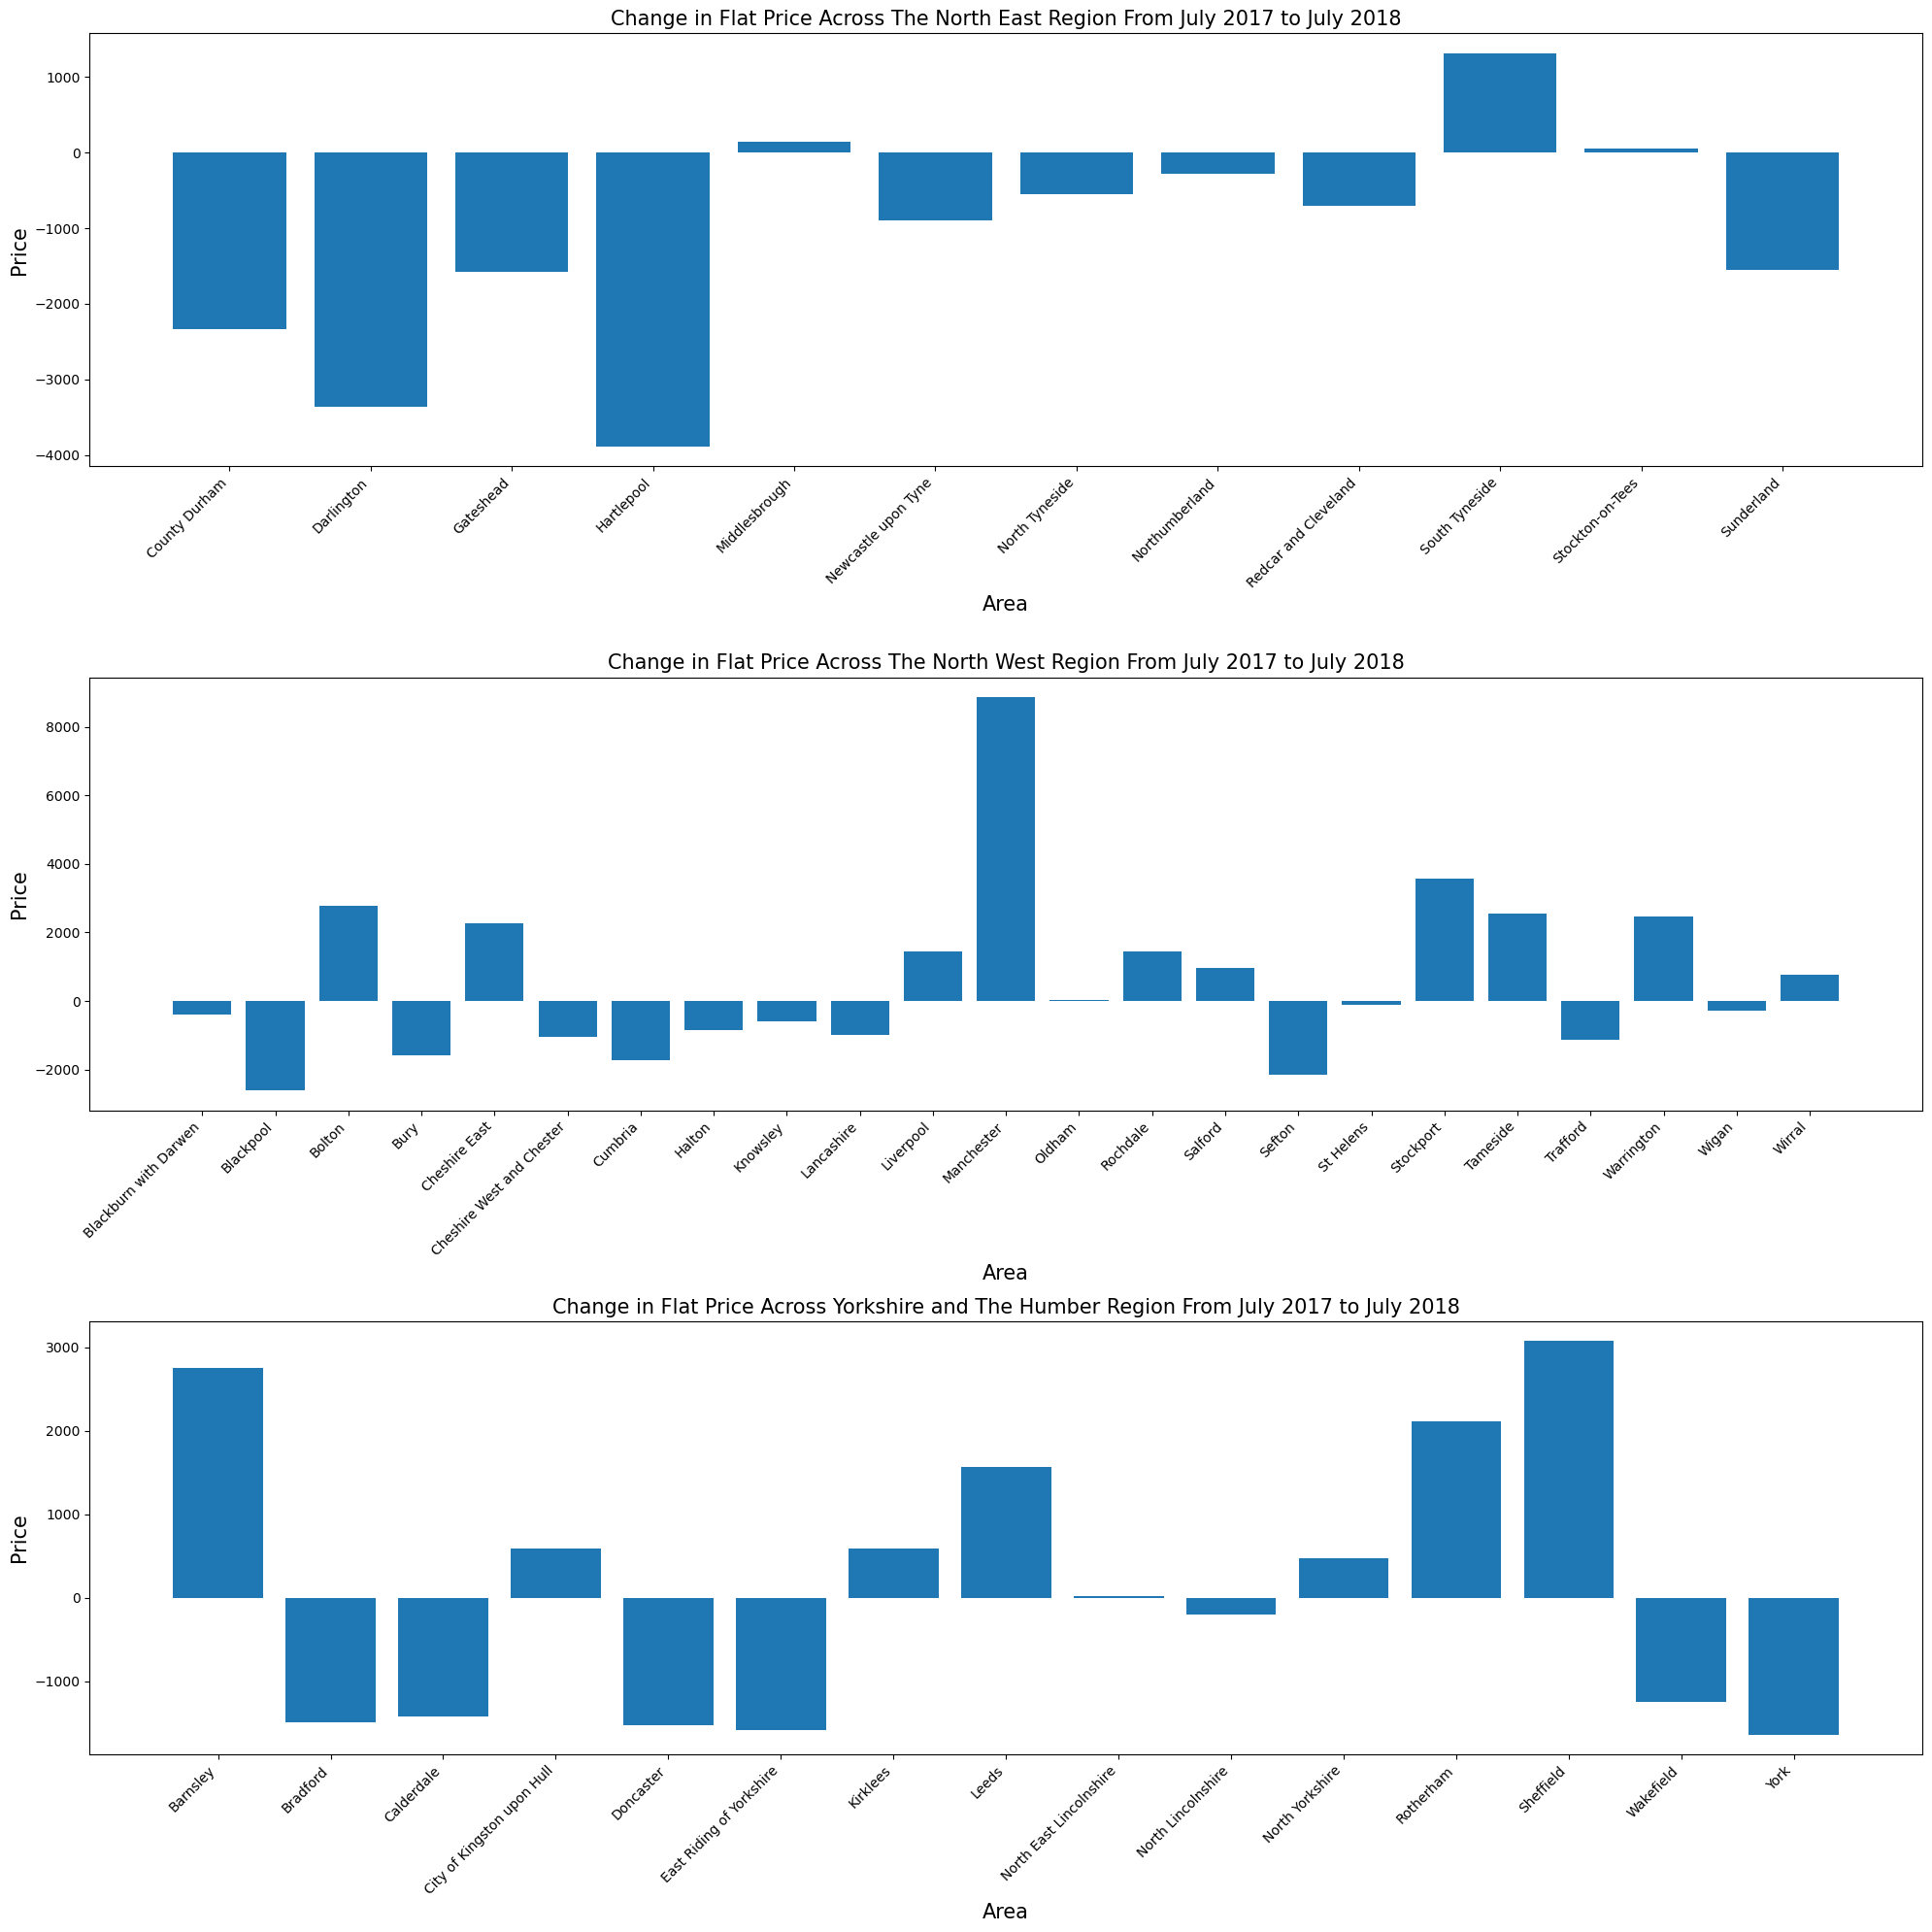

In [5]:
fig, axs = plt.subplots(3, figsize=(20,20))

axs[0].bar(NE['Area'], NE['Price Change'])
axs[0].set_xlabel('Area', fontsize= 15)
axs[0].set_ylabel('Price', fontsize= 15)
axs[0].set_title('Change in Flat Price Across The North East Region From July 2017 to July 2018', fontsize= 15)
axs[0].set_xticklabels(NE['Area'], rotation=45, ha='right')

axs[1].bar(NW['Area'], NW['Price Change'])
axs[1].set_xlabel('Area', fontsize= 15)
axs[1].set_ylabel('Price', fontsize= 15)
axs[1].set_title('Change in Flat Price Across The North West Region From July 2017 to July 2018', fontsize= 15)
axs[1].set_xticklabels(NW['Area'], rotation=45, ha='right')

axs[2].bar(YTH['Area'], YTH['Price Change'])
axs[2].set_xlabel('Area', fontsize= 15)
axs[2].set_ylabel('Price', fontsize= 15)
axs[2].set_title('Change in Flat Price Across Yorkshire and The Humber Region From July 2017 to July 2018', fontsize= 15)
axs[2].set_xticklabels(YTH['Area'], rotation=45, ha='right')


plt.tight_layout()
plt.show()


/var/folders/15/1_wklszx7252qmvrxtpkhgzm0000gn/T/ipykernel_1953/3014237627.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(EM['Area'], rotation=45, ha='right')
/var/folders/15/1_wklszx7252qmvrxtpkhgzm0000gn/T/ipykernel_1953/3014237627.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(WM['Area'], rotation=45, ha='right')
/var/folders/15/1_wklszx7252qmvrxtpkhgzm0000gn/T/ipykernel_1953/3014237627.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(EOE['Area'], rotation=45, ha='right')


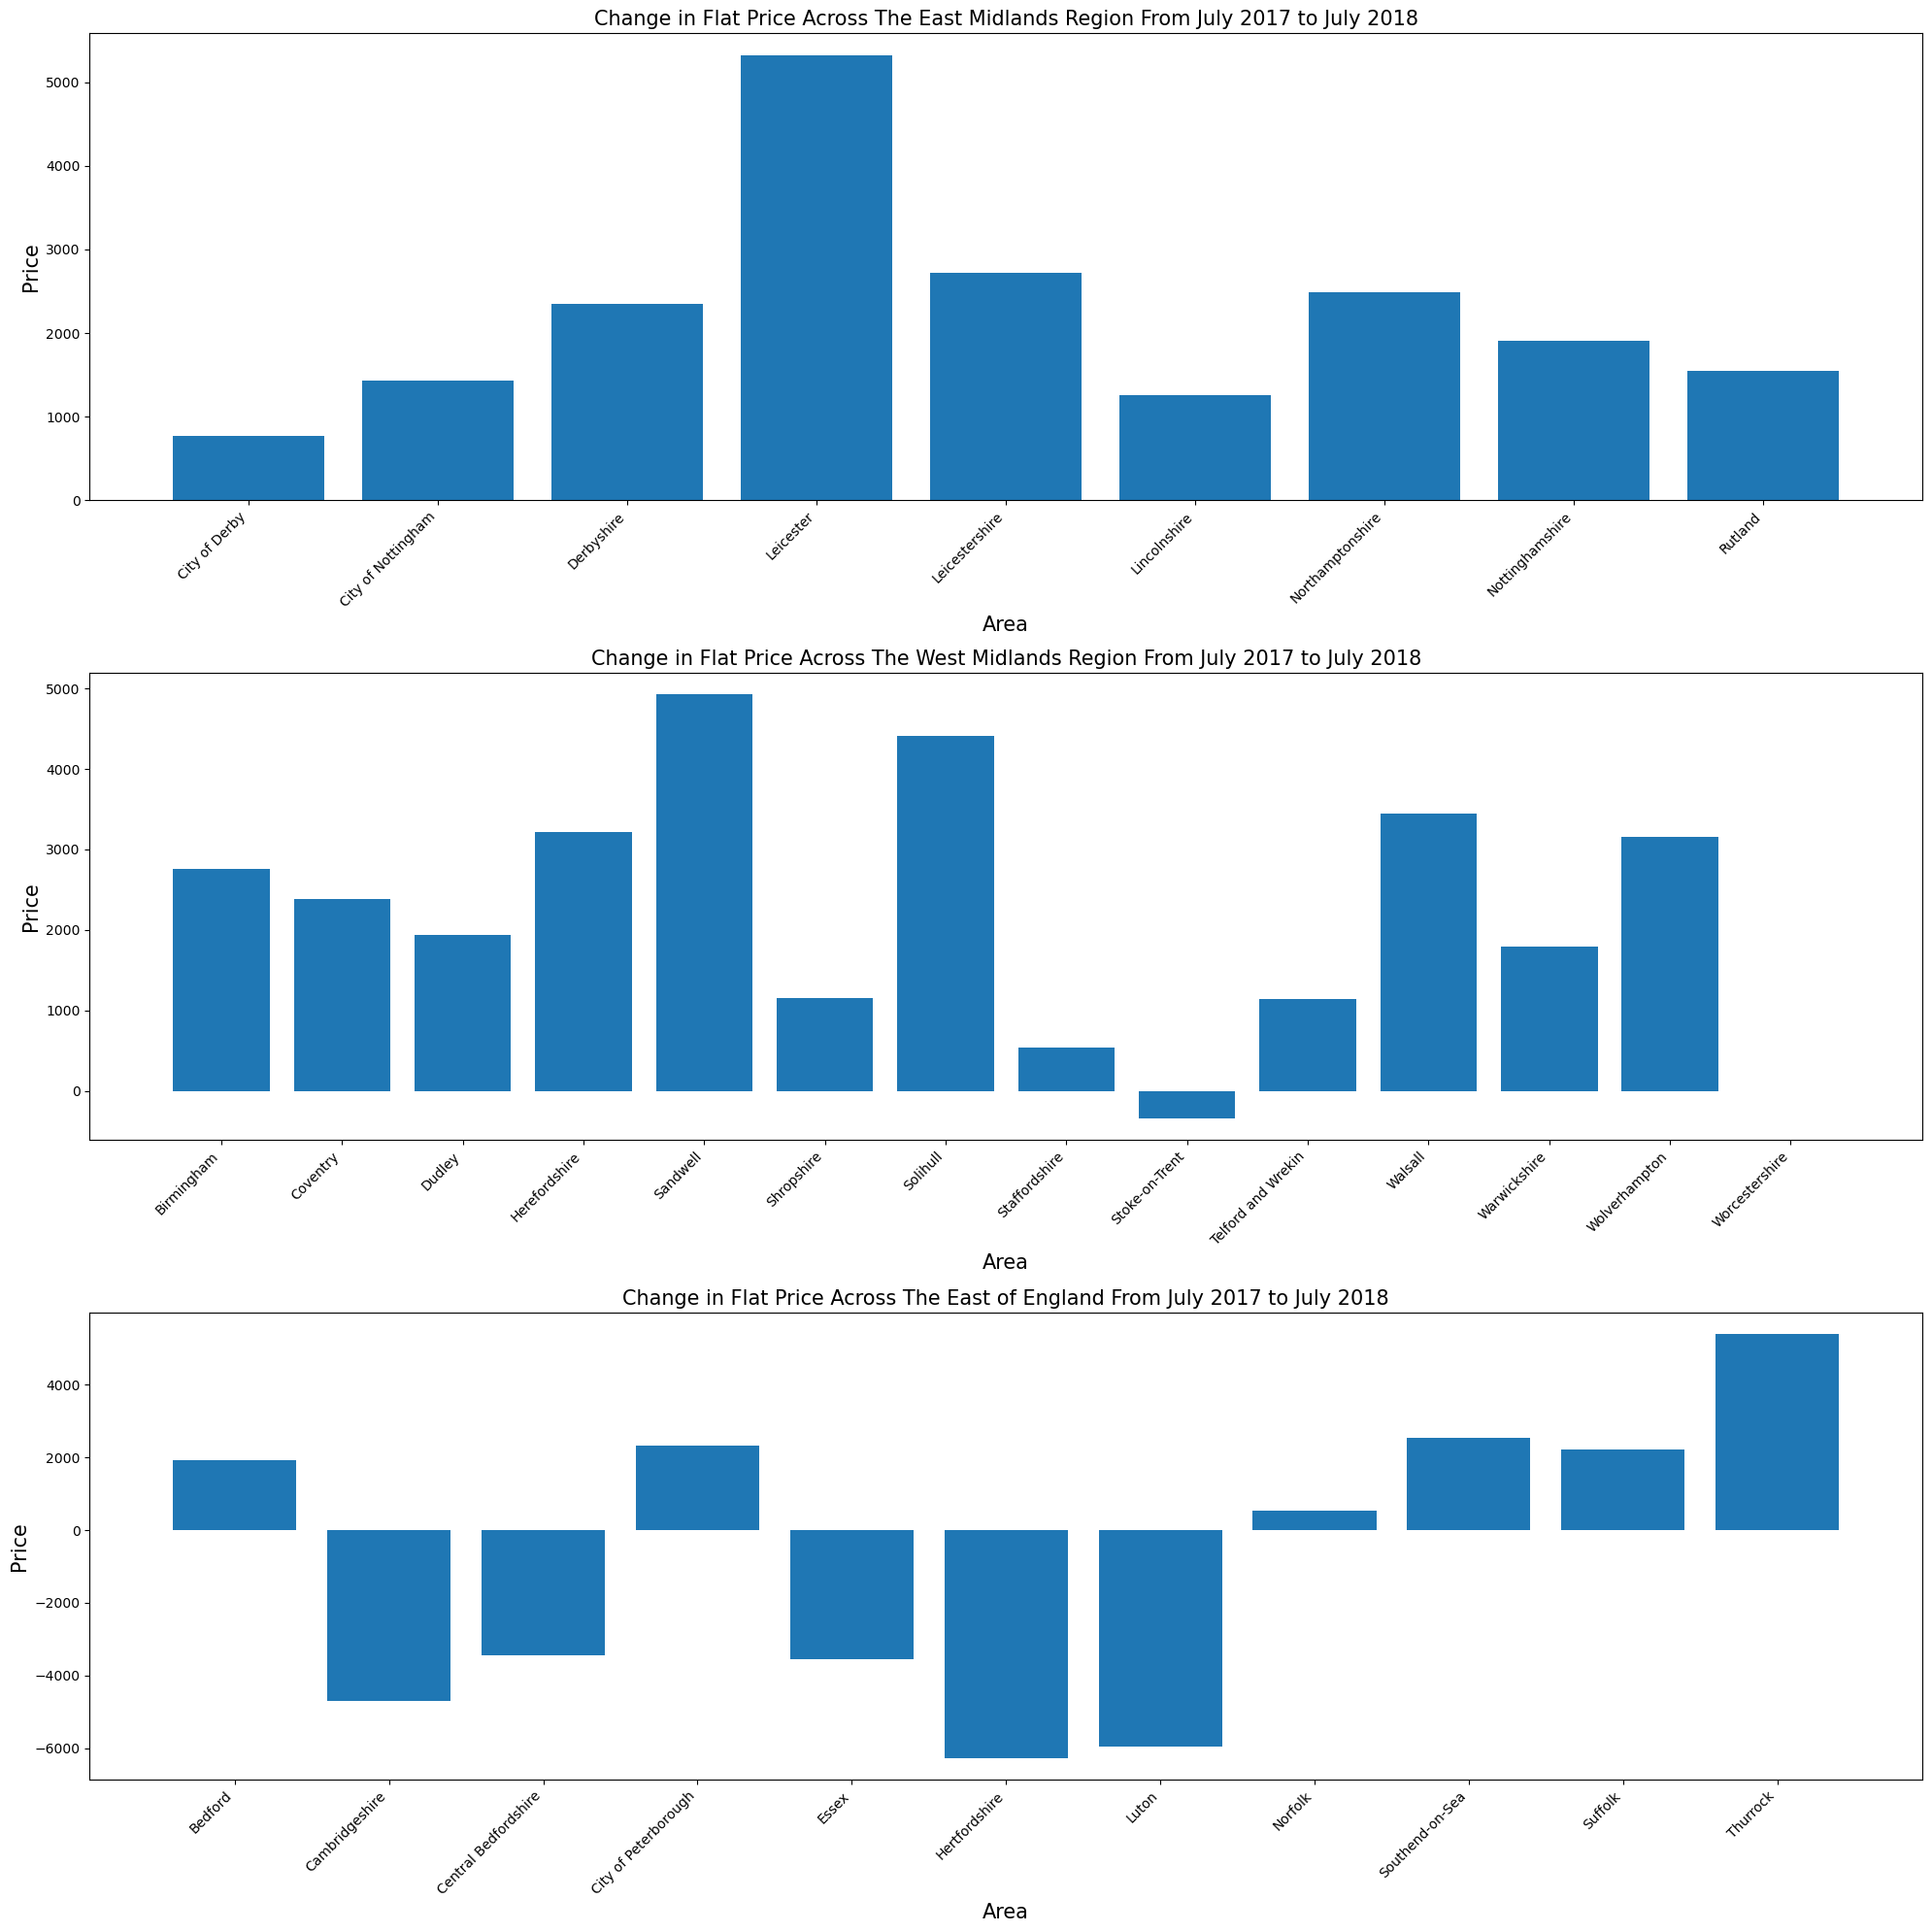

In [6]:
fig, axs = plt.subplots(3, figsize=(20,20))

axs[0].bar(EM['Area'], EM['Price Change'])
axs[0].set_xlabel('Area', fontsize= 15)
axs[0].set_ylabel('Price', fontsize= 15)
axs[0].set_title('Change in Flat Price Across The East Midlands Region From July 2017 to July 2018', fontsize= 15)
axs[0].set_xticklabels(EM['Area'], rotation=45, ha='right')

axs[1].bar(WM['Area'], WM['Price Change'])
axs[1].set_xlabel('Area', fontsize= 15)
axs[1].set_ylabel('Price', fontsize= 15)
axs[1].set_title('Change in Flat Price Across The West Midlands Region From July 2017 to July 2018', fontsize= 15)
axs[1].set_xticklabels(WM['Area'], rotation=45, ha='right')

axs[2].bar(EOE['Area'], EOE['Price Change'])
axs[2].set_xlabel('Area', fontsize= 15)
axs[2].set_ylabel('Price', fontsize= 15)
axs[2].set_title('Change in Flat Price Across The East of England From July 2017 to July 2018', fontsize= 15)
axs[2].set_xticklabels(EOE['Area'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

/var/folders/15/1_wklszx7252qmvrxtpkhgzm0000gn/T/ipykernel_1953/974231575.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(SW['Area'], rotation=45, ha='right')
/var/folders/15/1_wklszx7252qmvrxtpkhgzm0000gn/T/ipykernel_1953/974231575.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(SE['Area'], rotation=45, ha='right')
/var/folders/15/1_wklszx7252qmvrxtpkhgzm0000gn/T/ipykernel_1953/974231575.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(LDN['Area'], rotation=45, ha='right')


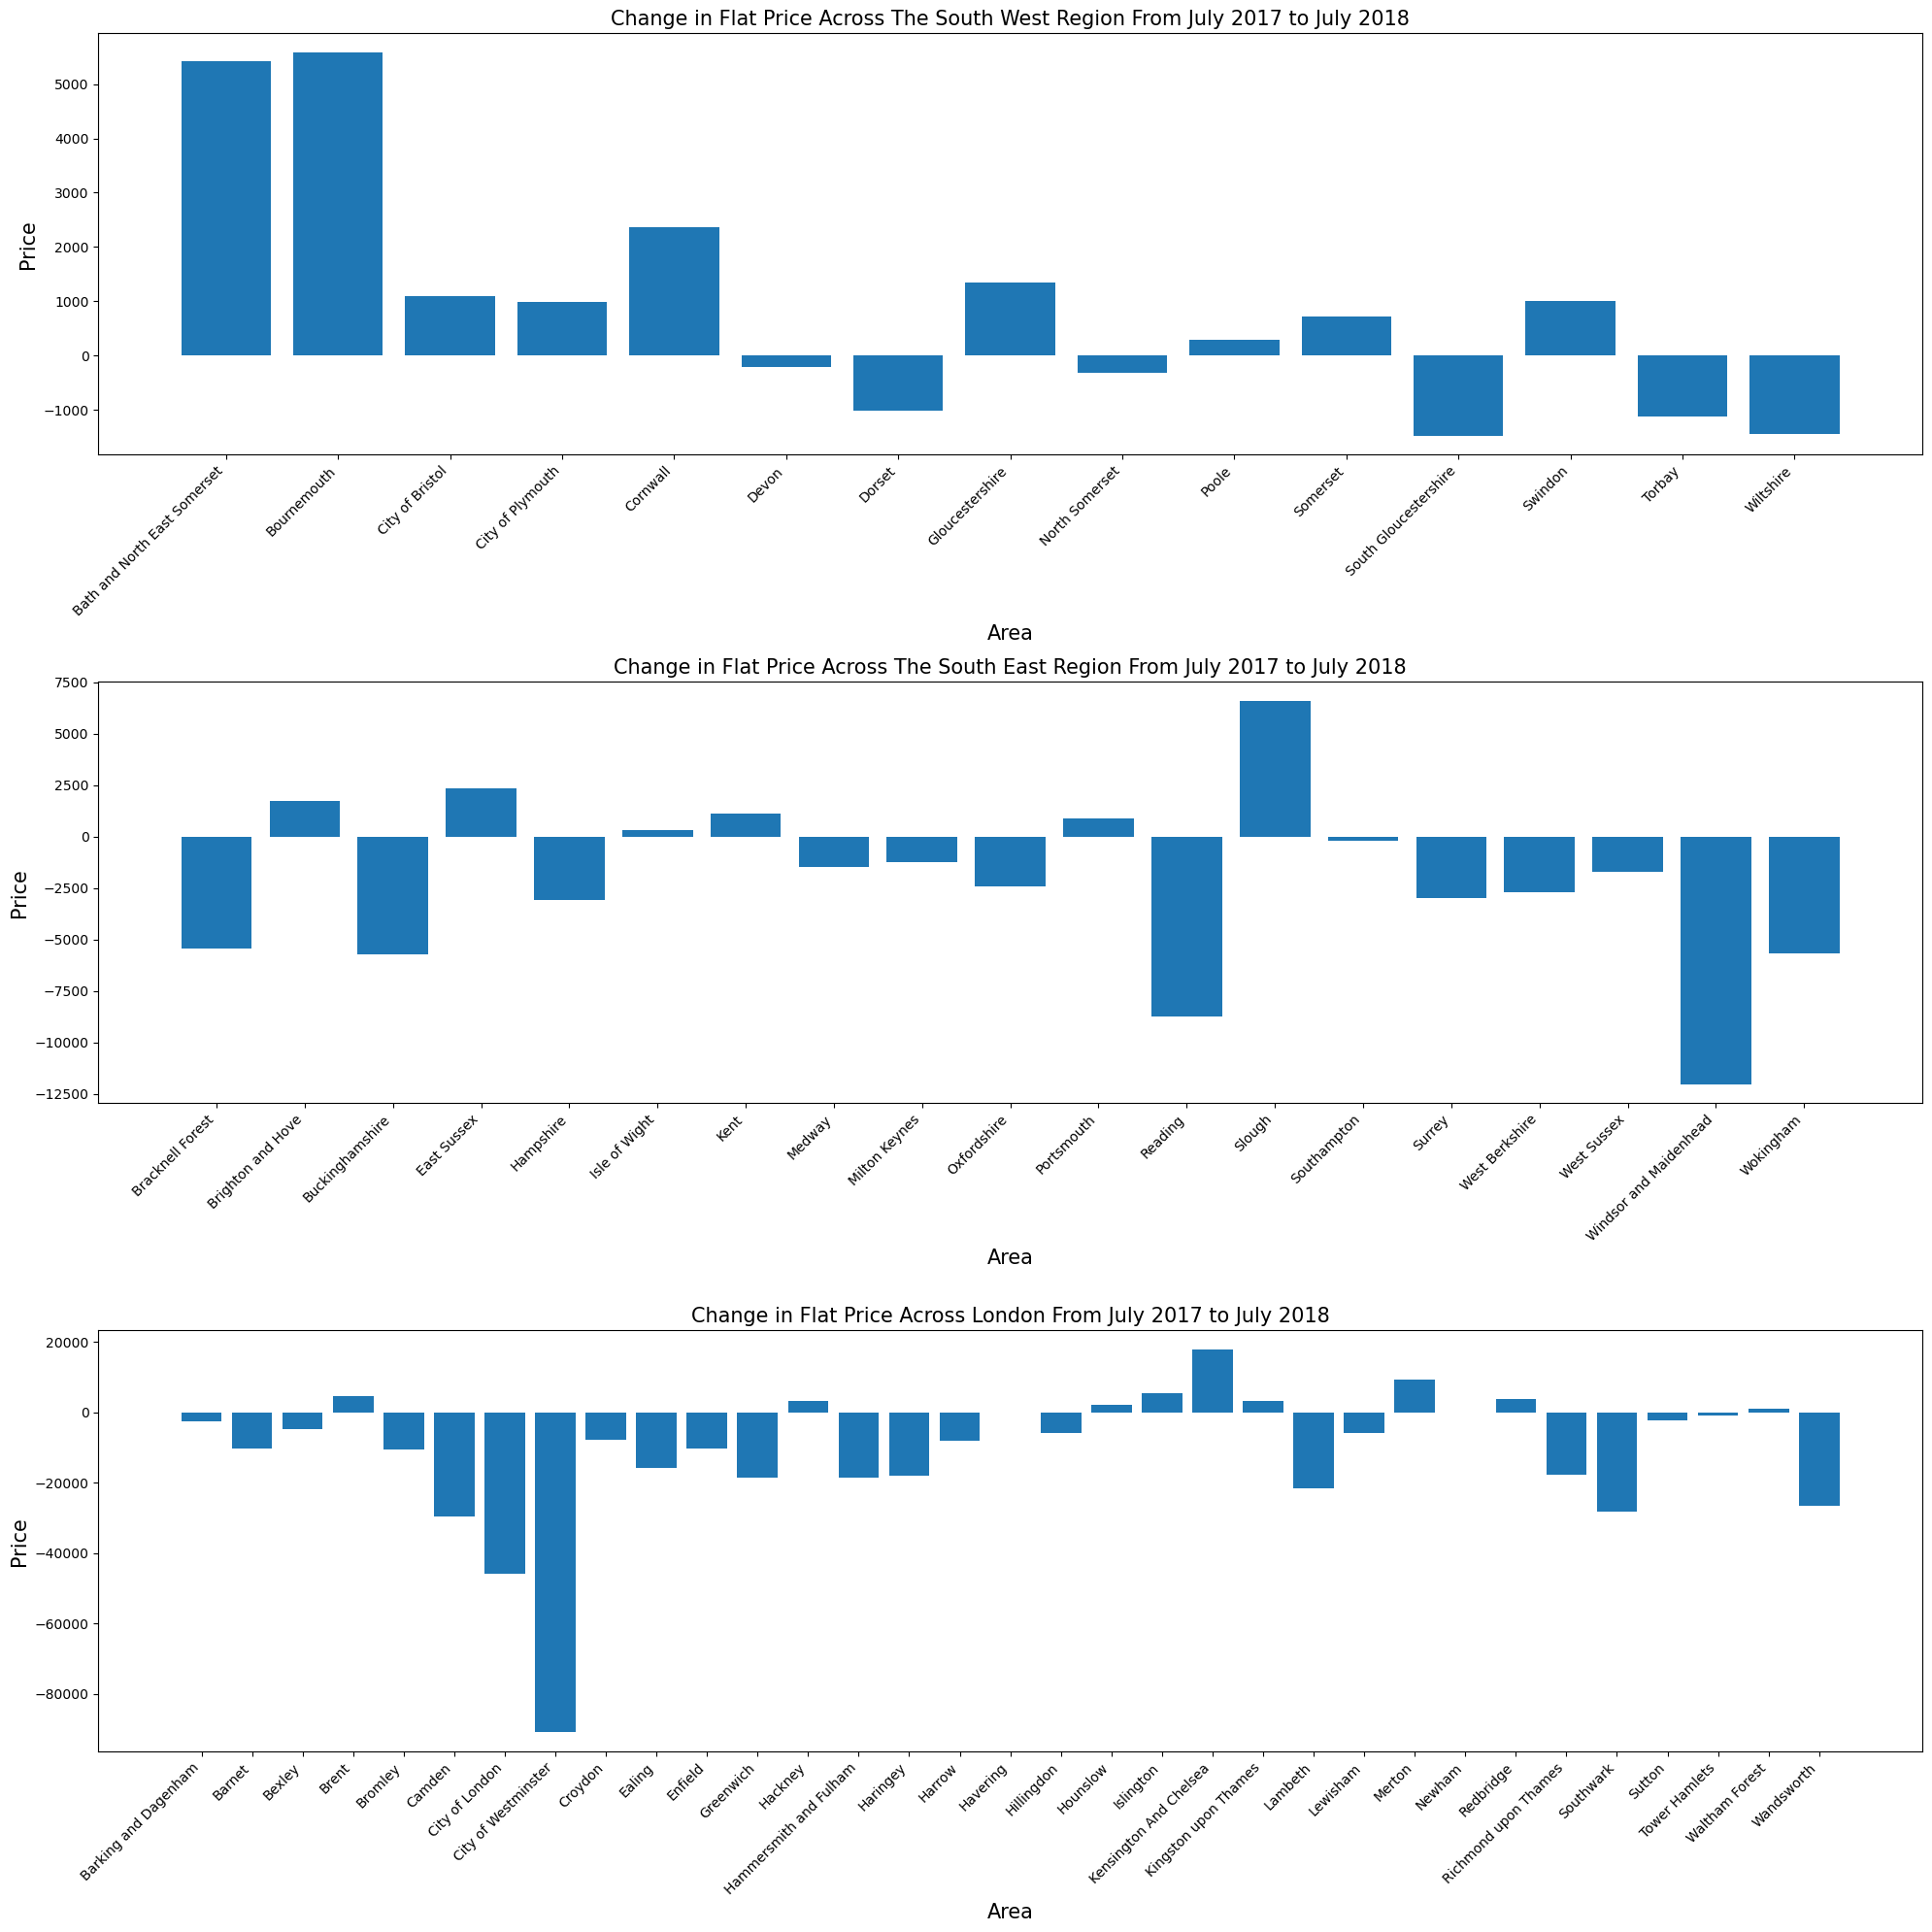

In [7]:
fig, axs = plt.subplots(3, figsize=(20,20))

axs[0].bar(SW['Area'], SW['Price Change'])
axs[0].set_xlabel('Area', fontsize= 15)
axs[0].set_ylabel('Price', fontsize= 15)
axs[0].set_title('Change in Flat Price Across The South West Region From July 2017 to July 2018', fontsize= 15)
axs[0].set_xticklabels(SW['Area'], rotation=45, ha='right')

axs[1].bar(SE['Area'], SE['Price Change'])
axs[1].set_xlabel('Area', fontsize= 15)
axs[1].set_ylabel('Price', fontsize= 15)
axs[1].set_title('Change in Flat Price Across The South East Region From July 2017 to July 2018', fontsize= 15)
axs[1].set_xticklabels(SE['Area'], rotation=45, ha='right')

axs[2].bar(LDN['Area'], LDN['Price Change'])
axs[2].set_xlabel('Area', fontsize= 15)
axs[2].set_ylabel('Price', fontsize= 15)
axs[2].set_title('Change in Flat Price Across London From July 2017 to July 2018', fontsize= 15)
axs[2].set_xticklabels(LDN['Area'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

* As we can infer from the West and East Midlands graphs, there have been significant increases in flat prices in areas within these regions.

* Outside of London, in the South East and West regions, we have seen minimal fluctuation in flat prices, with the majority of areas not experiencing any significant changes.

* In the Northern and Yorkshire regions, prices have increased. A significant pattern observed is that, outside of the major cities in the North and surrounding areas, there has been a sharp reduction in flat prices. This is highlighted by Manchester seeing a large increase, while smaller surrounding areas such as Stockport and Salford also see increases. However, areas like Blackpool, which are not as close to Manchester, have experienced a significant reduction in flat prices.

* In the East of England, we can't discern any noticeable patterns. Although areas close to major cities, such as Essex and Hertfordshire, have seen reductions in flat prices, more remote areas like Norfolk and Suffolk have experienced increases in flat prices.

## Section 2: Statistical Analysis

In this section, the aim is to understand the relationship between the region and the change in price by doing the following:

* Cross-tabulating region and change in price
* Performing statistical tests to assess the relationship between our variables

### Section 2.1: Cross-Tabulation of Price Change in Each Region

In this section, we will calculate the difference in flat prices using the following steps:

* Create a cross-tabulation table that counts how many times the price of flats in a given area has increased or decreased

In [14]:
def increaseordecrease(pricechange):
    if pricechange > 0:
        Change = 'Increase'
    elif pricechange < 0:
        Change = 'Decrease'
    else:
        Change = 'No Change'
    return Change
prices_pivot = prices_pivot.assign(Change=prices_pivot['Price Change'].apply(increaseordecrease))
prices_pivot

,RegionName,Area,Price2017,Price2018,Price Change,Change
0,East Midlands,City of Derby,95940.21897,96708.36963,768.15066,Increase
1,East Midlands,City of Nottingham,108859.84530,110295.36520,1435.51990,Increase
2,East Midlands,Derbyshire,115450.93520,117801.62630,2350.69110,Increase
3,East Midlands,Leicester,120506.20300,125824.12160,5317.91860,Increase
4,East Midlands,Leicestershire,122325.99780,125042.02740,2716.02960,Increase
...,...,...,...,...,...,...
146,Yorkshire and The Humber,North Yorkshire,138034.75480,138503.30320,468.54840,Increase
147,Yorkshire and The Humber,Rotherham,80127.94712,82237.41396,2109.46684,Increase
148,Yorkshire and The Humber,Sheffield,109118.56590,112189.50390,3070.93800,Increase
149,Yorkshire and The Humber,Wakefield,85260.35706,84010.08176,-1250.27530,Decrease


* In the above cells, we create a new column that indicates whether the change in price for a given instance was an increase or a decrease in the price of flats in the area.

In [10]:
crosstab_prices = pd.crosstab(index=prices_pivot.RegionName,values=prices_pivot['Price Change'] , columns = prices_pivot.Change, aggfunc='count')
crosstab_prices = crosstab_prices.fillna(0)
crosstab_prices

Change,Decrease,Increase
RegionName,,
East Midlands,0.0,9.0
East of England,5.0,6.0
London,23.0,10.0
North East,9.0,3.0
North West,12.0,11.0
South East,13.0,6.0
South West,6.0,9.0
West Midlands,2.0,12.0
Yorkshire and The Humber,7.0,8.0


* In the above cell, I have cross-tabulated region and change in price by counting the number of price changes per region.


### Section 2.2: Chi-Squared and Permutation Tests

In this section, we will perform the following steps to analyze the relationship between flat price changes and regions:

* Perform Chi-squared and permutation tests on the change in price and regions to assess the independence of the variables


In [11]:
test_stat, p_value, dof, expected = stats.chi2_contingency(crosstab_prices, correction=False, 
                                                           lambda_ = "log-likelihood")
print('The G test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))

The G test statistic is 32.19
The p-value is 0.009 %


In [12]:
def chi_squared_statistic(data1, data2):
    contingency_table = pd.crosstab(data1, data2)
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    return chi2


result = stats.permutation_test(
    (prices_pivot['RegionName'], prices_pivot['Change']), 
    chi_squared_statistic,                 
    n_resamples=10000,                 
    alternative='two-sided'               
)

print(f"P-value: {result.pvalue:.4f}")
print(f"Observed Chi-squared statistic: {result.statistic:.4f}")

P-value: 0.0002
Observed Chi-squared statistic: 27.5954


## Section 3: Discussion of Statistical Analysis

In this section, the aim is to discuss what we are testing for, compare the methods of testing, and evaluate the significance of the results obtained.

* A description of what is being tested
* A comparison of the methods of testing
* A discussion of the significance of the p-values and other statistical measures obtained


### Section 3.1 Purpose of statistical tests

* With the Chi-squared test, we are testing whether the change in price and the region in which the change occurs are independent. In other words, we are testing to see whether the change in the price of a flat in an area is affected by the region in which the area is located.

* With the permutation test, we are testing if there is a significant difference between the number of areas where the price increased or decreased. It helps us determine whether the differences between the values are statistically significant or if they are due to random chance.

### Section 3.2 Comparison of the Methods of Testing

* The Chi-squared test result is derived by comparing the expected frequencies against the observed frequencies. The purpose of the test is to determine whether the difference between the observed and expected frequencies is statistically significant.

* The permutation test assesses whether there is a significant difference in the observed effect, which, in this case, is how the region affects the change in flat prices. It does this by comparing the observed values to a distribution of results generated by randomized permutations of the data.

* When comparing both methods of testing, the key differentiator is that the Chi-squared test is more rigid, as it is used for categorical data only, whereas the permutation test is more flexible and can be used for both categorical and continuous data. In terms of testing, the Chi-squared test checks whether the variables are independent of each other, while the permutation test assesses the significance of the observed statistic.


### Section 3.3 Explanation of Test Results

* For the Chi-squared test, the null hypothesis is that there is no association between the region and the change in price; therefore, the distribution of the change in price is independent of the region. Since the p-value is 0.009, which is less than 0.05, we reject the null hypothesis and can conclude that the region and the change in price are significantly associated. With our G-test statistic of 32.19, this indicates a significant difference between the observed and expected frequencies, further suggesting a strong association between the region and the change in price, as indicated by the initial interpretation of the p-value.

* For the permutation test, the null hypothesis is that there is no association between the region and the change in price. Based on the p-value of 0.002, which is significantly below the 0.05 threshold, we can reject the null hypothesis. This suggests a strong and statistically significant relationship between the region and the change in price. The Chi-squared statistic of 27.5954 provides further evidence for this, as it indicates that the observed data is substantially different from the expected data under the assumption that there is no association between the region and the change in price.
